# Importing and preparing Butter data

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('groceries_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

groceries_database.db
your_database.db


## Create SQL-table in the database

In [3]:
import sqlite3

conn = sqlite3.connect('groceries_database.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS eggs_table (
                  eggsId VARCHAR(50),
                  product_type VARCHAR(200),
                  web_scraper_order DECIMAL(8, 2),
                  web_scraper_start_url VARCHAR(500),
                  productname_raw VARCHAR(200),
                  price_raw DECIMAL(8, 2),
                  piece INT,
                  Supermarkt VARCHAR(50),
                  price_per DECIMAL(8, 3)
                  )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS flour_table (
                  flourId VARCHAR(50),
                  product_type VARCHAR(200),
                  web_scraper_order DECIMAL(8, 2),
                  web_scraper_start_url VARCHAR(500),
                  productname_raw VARCHAR(200),
                  price_raw DECIMAL(8, 2),
                  piece INT,
                  Supermarkt VARCHAR(50),
                  price_per DECIMAL(8, 3)
                  )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS butter_table (
                  butterId VARCHAR(50),
                  product_type VARCHAR(200),
                  web_scraper_order DECIMAL(8, 2),
                  web_scraper_start_url VARCHAR(500),
                  productname_raw VARCHAR(200),
                  price_raw DECIMAL(8, 2),
                  piece INT,
                  Supermarkt VARCHAR(50),
                  price_per DECIMAL(8, 3)
                  )''')


conn.commit()


# Read data from file to data frame 

## Butter

In [4]:
df = pd.read_csv('CSV/prepared/Butter_Merged.csv', 
                 sep=';', 
                 encoding='utf-8')[['product_type', 'web-scraper-order', 'web-scraper-start-url', 'productname_raw', 'price_raw', 'weight_raw', 'Supermarkt', 'price_per_100g']]
print(df.shape)
df.head(5)


(124, 8)


,product_type,web-scraper-order,web-scraper-start-url,productname_raw,price_raw,weight_raw,Supermarkt,price_per_100g
0,butter,1698754764-1,https://www.aldi-now.ch/de/milchprodukte-&-eie...,Die Butter,3.95,250,Aldi,1.58
1,butter,1698754764-2,https://www.aldi-now.ch/de/milchprodukte-&-eie...,RETOUR AUX SOURCES BIO Butter,4.19,200,Aldi,2.10
2,butter,1698754764-3,https://www.aldi-now.ch/de/milchprodukte-&-eie...,"BIO NATURA Butter 100 g, laktosefrei",2.95,100,Aldi,2.95
3,butter,1698754764-4,https://www.aldi-now.ch/de/milchprodukte-&-eie...,MILFINA Kochbutter,3.49,250,Aldi,1.40
4,butter,1698754764-5,https://www.aldi-now.ch/de/milchprodukte-&-eie...,MILFINA Kräuterbutter,2.85,100,Aldi,2.85


### Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'butter_table',
          con = conn,
          index = False,
          if_exists = 'replace')

124

### Additional SQL-Queries

In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('groceries_database.db')

# Query the SQL-table for butter_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM butter_table''')

if cursor.description is not None:
    columns = [description[0] for description in cursor.description]

    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)

    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")


    product_type web-scraper-order  \
0         butter      1698754764-1   
1         butter      1698754764-2   
2         butter      1698754764-3   
3         butter      1698754764-4   
4         butter      1698754764-5   
..           ...               ...   
119       butter     1698740582-60   
120       butter     1698740582-61   
121       butter     1698740582-62   
122       butter     1698740582-63   
123       butter     1698740582-64   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
119  https://www.migros.ch/de/search?query=Butter&f...   
120  https://www.migros.ch/de/search?query=Butter&f...   
121  https://www.migr

### Grafik Butter

    product_type web-scraper-order  \
0         butter      1698754764-1   
1         butter      1698754764-2   
2         butter      1698754764-3   
3         butter      1698754764-4   
4         butter      1698754764-5   
..           ...               ...   
119       butter     1698740582-60   
120       butter     1698740582-61   
121       butter     1698740582-62   
122       butter     1698740582-63   
123       butter     1698740582-64   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
119  https://www.migros.ch/de/search?query=Butter&f...   
120  https://www.migros.ch/de/search?query=Butter&f...   
121  https://www.migr

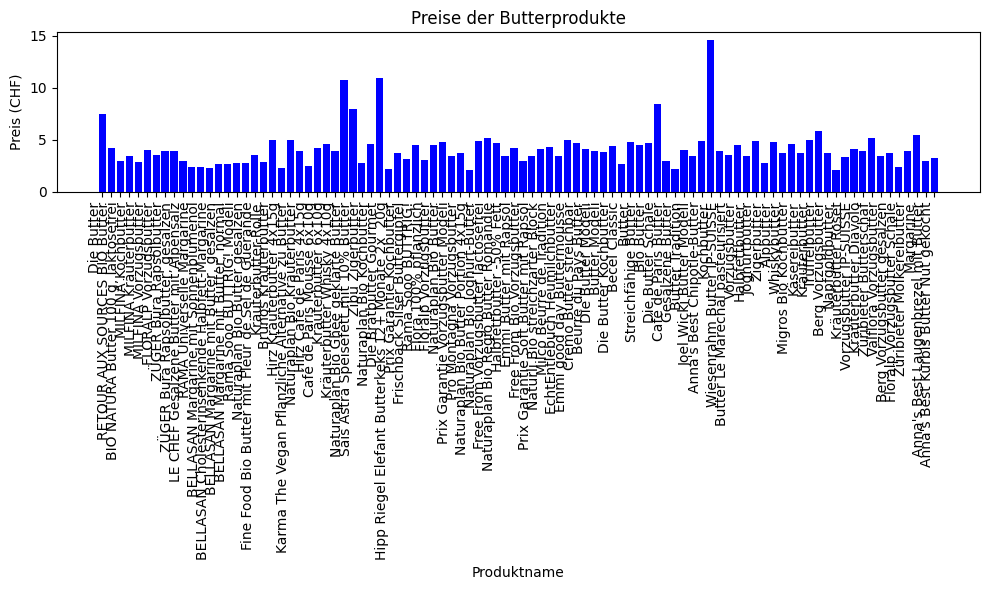

In [7]:
import matplotlib.pyplot as plt

print(df_all)

plt.figure(figsize=(10, 6))
plt.bar(df_all['productname_raw'], df_all['price_raw'], color='blue')
plt.xlabel('Produktname')
plt.ylabel('Preis (CHF)')
plt.title('Preise der Butterprodukte')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()


## Eier

In [8]:
df = pd.read_csv('CSV/prepared/Eggs_Merged.csv', 
                 sep=';', 
                 encoding='utf-8')[['product_type', 'web-scraper-order', 'web-scraper-start-url', 'productname_raw', 'price_raw', 'pieces_raw', 'Supermarkt', 'price_per_piece']]
print(df.shape)
df.head(5)


(108, 8)


,product_type,web-scraper-order,web-scraper-start-url,productname_raw,price_raw,pieces_raw,Supermarkt,price_per_piece
0,eggs,1698755441-1,https://www.aldi-now.ch/de/milchprodukte-&-eie...,"Eier Bodenhaltung Import, 10er-Pack",2.83,10,Aldi,0.28
1,eggs,1698755441-2,https://www.aldi-now.ch/de/milchprodukte-&-eie...,"Schweizer Eier Bodenhaltung, 10er-Pack",3.95,10,Aldi,0.40
2,eggs,1698755441-3,https://www.aldi-now.ch/de/milchprodukte-&-eie...,"NATURE SUISSE Freilandeier Pic Nic, 6er-Pack",3.49,6,Aldi,0.58
3,eggs,1698755441-4,https://www.aldi-now.ch/de/milchprodukte-&-eie...,"RETOUR AUX SOURCES BIO Pic Nic Freilandeier, 4...",3.95,4,Aldi,0.99
4,eggs,1698755441-5,https://www.aldi-now.ch/de/milchprodukte-&-eie...,"NATURE SUISSE Freilandeier, 6er-Pack",3.19,6,Aldi,0.53


### Write data to the SQL-table in data base

In [9]:
df.to_sql(name = 'eggs_table',
          con = conn,
          index = False,
          if_exists = 'replace')

108

### Additional SQL-Queries

In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('groceries_database.db')

cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM eggs_table''')

if cursor.description is not None:
    columns = [description[0] for description in cursor.description]

    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)

    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")


    product_type web-scraper-order  \
0           eggs      1698755441-1   
1           eggs      1698755441-2   
2           eggs      1698755441-3   
3           eggs      1698755441-4   
4           eggs      1698755441-5   
..           ...               ...   
103         eggs     1698742125-82   
104         eggs     1698742125-83   
105         eggs     1698742125-84   
106         eggs     1698742125-85   
107         eggs     1698742125-86   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
103  https://www.migros.ch/de/search?query=Eier&fil...   
104  https://www.migros.ch/de/search?query=Eier&fil...   
105  https://www.migr

### Grafik Eier

    product_type web-scraper-order  \
0           eggs      1698755441-1   
1           eggs      1698755441-2   
2           eggs      1698755441-3   
3           eggs      1698755441-4   
4           eggs      1698755441-5   
..           ...               ...   
103         eggs     1698742125-82   
104         eggs     1698742125-83   
105         eggs     1698742125-84   
106         eggs     1698742125-85   
107         eggs     1698742125-86   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
103  https://www.migros.ch/de/search?query=Eier&fil...   
104  https://www.migros.ch/de/search?query=Eier&fil...   
105  https://www.migr

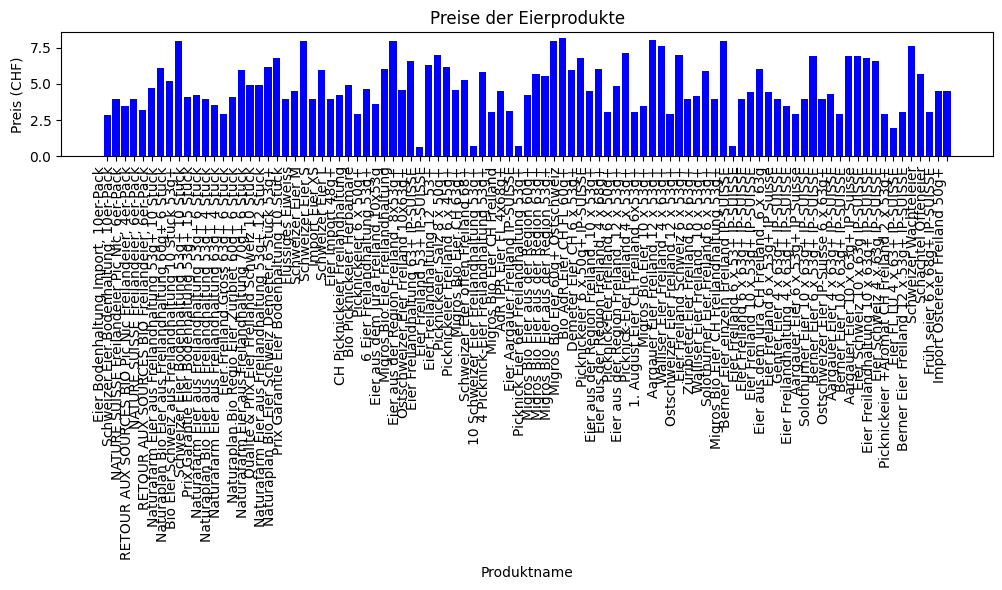

In [11]:
import matplotlib.pyplot as plt

print(df_all)

plt.figure(figsize=(10, 6))
plt.bar(df_all['productname_raw'], df_all['price_raw'], color='blue')
plt.xlabel('Produktname')
plt.ylabel('Preis (CHF)')
plt.title('Preise der Eierprodukte')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()


## Mehl

In [12]:
df = pd.read_csv('CSV/prepared/Flour_Merged.csv', 
                 sep=';', 
                 encoding='utf-8')[['product_type', 'web-scraper-order', 'web-scraper-start-url', 'productname_raw', 'price_raw', 'weight_raw', 'Supermarkt', 'price_per_kg']]
print(df.shape)
df.head(5)


(67, 8)


,product_type,web-scraper-order,web-scraper-start-url,productname_raw,price_raw,weight_raw,Supermarkt,price_per_kg
0,flour,1698753392-1,https://www.aldi-now.ch/de/vorr%C3%A4te/backar...,NATURE SUISSE BIO Halbweissmehl,2.99,1.0,Aldi,2.99
1,flour,1698753392-2,https://www.aldi-now.ch/de/vorr%C3%A4te/backar...,HAPPY HARVEST Zopfmehl,1.99,1.0,Aldi,1.99
2,flour,1698753392-3,https://www.aldi-now.ch/de/vorr%C3%A4te/backar...,HAPPY HARVEST Ruchmehl,2.19,1.0,Aldi,2.19
3,flour,1698753392-4,https://www.aldi-now.ch/de/vorr%C3%A4te/backar...,HAPPY HARVEST Weissmehl,0.99,1.0,Aldi,0.99
4,flour,1698753392-5,https://www.aldi-now.ch/de/vorr%C3%A4te/backar...,"HAPPY HARVEST Brotbackmischung, Vollkornbrot",1.99,1.0,Aldi,1.99


### Write data to the SQL-table in data base

In [13]:
df.to_sql(name = 'flour_table',
          con = conn,
          index = False,
          if_exists = 'replace')

67

### Additional SQL-Queries

In [14]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('groceries_database.db')

cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM flour_table''')

if cursor.description is not None:
    columns = [description[0] for description in cursor.description]

    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)
    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")


   product_type web-scraper-order  \
0         flour      1698753392-1   
1         flour      1698753392-2   
2         flour      1698753392-3   
3         flour      1698753392-4   
4         flour      1698753392-5   
..          ...               ...   
62        flour     1698741806-33   
63        flour     1698741806-34   
64        flour     1698741806-42   
65        flour     1698741806-43   
66        flour     1698741806-44   

                                web-scraper-start-url  \
0   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
1   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
2   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
3   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
4   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
..                                                ...   
62         https://www.migros.ch/de/search?query=Mehl   
63         https://www.migros.ch/de/search?query=Mehl   
64         https://www.migros.ch/de/search

### Grafik Mehl

   product_type web-scraper-order  \
0         flour      1698753392-1   
1         flour      1698753392-2   
2         flour      1698753392-3   
3         flour      1698753392-4   
4         flour      1698753392-5   
..          ...               ...   
62        flour     1698741806-33   
63        flour     1698741806-34   
64        flour     1698741806-42   
65        flour     1698741806-43   
66        flour     1698741806-44   

                                web-scraper-start-url  \
0   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
1   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
2   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
3   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
4   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
..                                                ...   
62         https://www.migros.ch/de/search?query=Mehl   
63         https://www.migros.ch/de/search?query=Mehl   
64         https://www.migros.ch/de/search

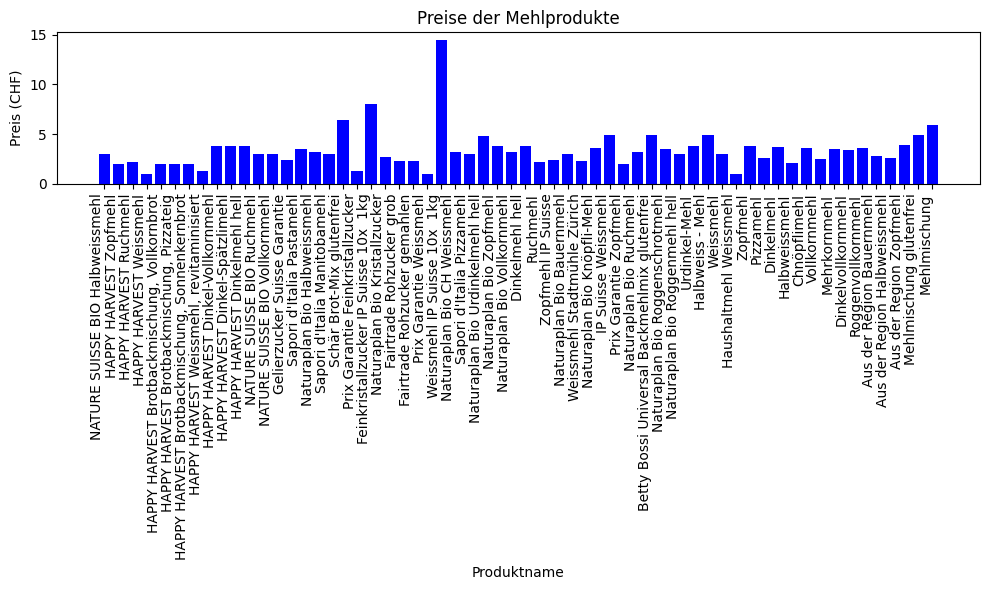

In [15]:
import matplotlib.pyplot as plt

print(df_all)

plt.figure(figsize=(10, 6))
plt.bar(df_all['productname_raw'], df_all['price_raw'], color='blue')
plt.xlabel('Produktname')
plt.ylabel('Preis (CHF)')
plt.title('Preise der Mehlprodukte')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Diagramm anzeigen
plt.show()
